<a href="https://colab.research.google.com/github/aacasallas/TalentoTech_AlvaroCasallas/blob/main/ProyectoAnalisisY_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Conexion base de datos
conexion =sqlite3.connect('/content/drive/MyDrive/Analisis/Proyecto_Analisis/Prueba4.db')
cursor= conexion.cursor()
df_original=pd.read_sql("""SELECT * FROM LlamadasEmergencia limit 11;""",conexion)

In [13]:
#backup dataframe original
df_aux=df_original.copy()
df_aux


,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,CLASIFICACION_FINAL,Id_Genero,Id_Red,Id_Localidad
0,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,CODIGO_LOCALIDAD,LOCALIDAD,EDAD,GENERO,RED,TIPO_INCIDENTE,PRIORIDAD,CLASIFICACION_FINAL,NaN,NaN,NaN
1,2019-01-01 00:04:37,11,Suba,None,None,Norte,Lesiones personales,Alta,Cancelado,NaN,1.0,15.0
2,2019-01-01 00:07:41,3,Santa Fe,51,Femenino,Norte,Dolor torácico,Alta,Traslado,1.0,1.0,14.0
3,2019-01-01 00:07:46,10,Engativá,None,None,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Falsa Alarma,NaN,1.0,6.0
4,2019-01-01 00:08:06,16,Puente Aranda,None,None,Sur,Accidente de tránsito con heridos/muertos,Alta,Cancelado,NaN,2.0,11.0
5,2019-01-01 00:10:26,15,Antonio Nariño,None,None,Norte,Inconsciente/paro cardiorrespiratorio,Alta,Cancelado,NaN,1.0,1.0
6,2019-01-01 00:10:40,8,Kennedy,None,None,Sur,Herido con pólvora,Alta,Cancelado,NaN,2.0,8.0
7,2019-01-01 00:10:58,15,Antonio Nariño,None,None,Sur,Inconsciente/paro cardiorrespiratorio,Alta,Cancelado,NaN,2.0,1.0
8,2019-01-01 00:11:37,7,Bosa,None,None,Sur,Intento de suicidio,Alta,Cancelado,NaN,2.0,3.0
9,2019-01-01 00:11:49,11,Suba,None,None,Norte,Disparos,Alta,Falsa Alarma,NaN,1.0,15.0


In [14]:
df_limpieza=pd.read_sql("""
SELECT Le.FECHA_INICIO_DESPLAZAMIENTO_MOVIL, Le.EDAD, Le.PRIORIDAD,
Le.CLASIFICACION_FINAL, Le.TIPO_INCIDENTE, Ge.Descripcion as GENERO,
 Lo.Descripcion as LOCALIDAD, Re.Descripcion as RED
FROM LlamadasEmergencia AS LE
INNER JOIN Genero as Ge ON LE.Id_Genero=Ge.id
INNER JOIN Red AS RE ON LE.Id_Red = Re.id
INNER JOIN Localidad AS Lo ON LE.Id_Localidad=Lo.id
WHERE
Ge.Descripcion in ('Femenino','Masculino')AND
Le.EDAD BETWEEN 6 and 100 AND
Le.prioridad in ('Alta','Baja','Media') AND
le.CLASIFICACION_FINAL NOT NULL AND
TIPO_INCIDENTE  NOT NULL
 """,conexion)
df_limpieza

,FECHA_INICIO_DESPLAZAMIENTO_MOVIL,EDAD,PRIORIDAD,CLASIFICACION_FINAL,TIPO_INCIDENTE,GENERO,LOCALIDAD,RED
0,2019-01-01 00:07:41,51,Alta,Traslado,Dolor torácico,Femenino,Santa Fe,Norte
1,2019-01-01 00:12:04,19,Alta,Trasladado por Otro Recurso,Intento de suicidio,Masculino,Bosa,Sur
2,2019-01-01 00:13:23,51,Alta,Desistimiento,Herido con pólvora,Femenino,Kennedy,Sur
3,2019-01-01 00:14:28,33,Alta,Desistimiento,Herido con pólvora,Femenino,Ciudad Bolívar,Sur
4,2019-01-01 00:23:55,50,Alta,Fallecido,Inconsciente/paro cardiorrespiratorio,Masculino,Rafael Uribe Uribe,Sur
...,...,...,...,...,...,...,...,...
82622,2019-08-31 23:47:00,74,Alta,Traslado,Enfermo,Femenino,Engativá,Norte
82623,2019-08-31 23:49:00,23,Alta,Traslado,Trastorno mental,Masculino,Chapinero,Norte
82624,2019-08-31 23:52:00,24,Alta,Traslado,Accidente de tránsito con heridos/muertos,Masculino,Kennedy,Sur
82625,2019-08-31 23:56:00,73,Alta,Desistimiento,Dificultad respiratoria,Femenino,Suba,Norte


In [15]:
df_ejercicio=df_limpieza.copy()

In [16]:
# traer los registros donde la clasificacion final es cancelado
#df_aux=df_ejercicio[df_ejercicio['CLASIFICACION_FINAL']=='Traslado'].count()
# total_traslados = df_ejercicio[df_ejercicio['CLASIFICACION_FINAL']=='Traslado'].shape[0]
# df_total_traslado = pd.DataFrame({'Total Traslados': [total_traslados]})

# total_desistimiento= df_ejercicio[df_ejercicio['CLASIFICACION_FINAL']=='Desistimiento'].shape[0]
# df_total_desistimiento = pd.DataFrame({'Total Traslados': [total_desistimiento]})

# total_Fallecido = df_ejercicio[df_ejercicio['CLASIFICACION_FINAL']=='Fallecido'].shape[0]
# df_total_Fallecido = pd.DataFrame({'Total Traslados': [total_Fallecido]})

# total_Cancelado = df_ejercicio[df_ejercicio['CLASIFICACION_FINAL']=='Cancelado'].shape[0]
# df_total_Cancelado = pd.DataFrame({'Total Traslados': [total_Cancelado]})

# print(f"Traslados  {total_traslados}")
# print(f"Desistimiento  {total_desistimiento}")
# print(f"Fallecido  {total_Fallecido}")
# print(f"Cancelado  {total_Cancelado}")

clasificacion_final_counts = df_ejercicio['CLASIFICACION_FINAL'].value_counts().to_dict()
data = {'Clasificación': list(clasificacion_final_counts.keys()),
        'Total': list(clasificacion_final_counts.values())}
df_clasificaciones = pd.DataFrame(data)
print(df_clasificaciones)

                 Clasificación  Total
0                     Traslado  65159
1                Desistimiento   9783
2          No Amerita Traslado   4397
3                    Fallecido   2024
4  Trasladado por Otro Recurso   1165
5          Trasladado por Otro     99


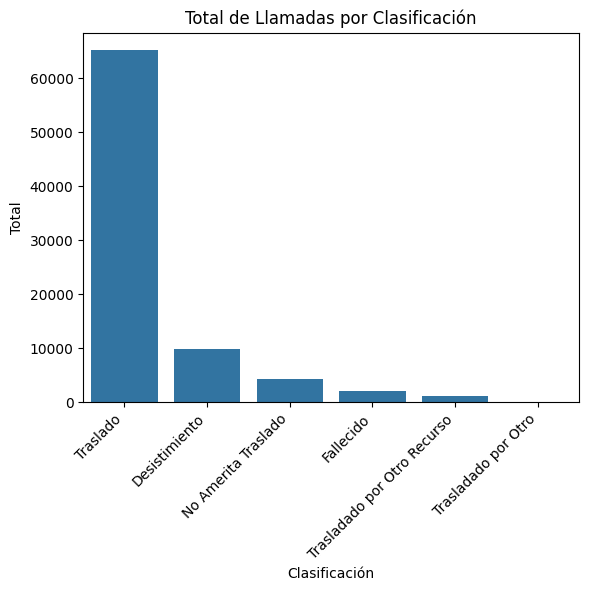

In [17]:

# Crear el gráfico de barras
sns.barplot(x="Clasificación", y="Total", data=df_clasificaciones)

# Añadir etiquetas y título (opcional)
plt.xlabel("Clasificación")
plt.ylabel("Total")
plt.title("Total de Llamadas por Clasificación")

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

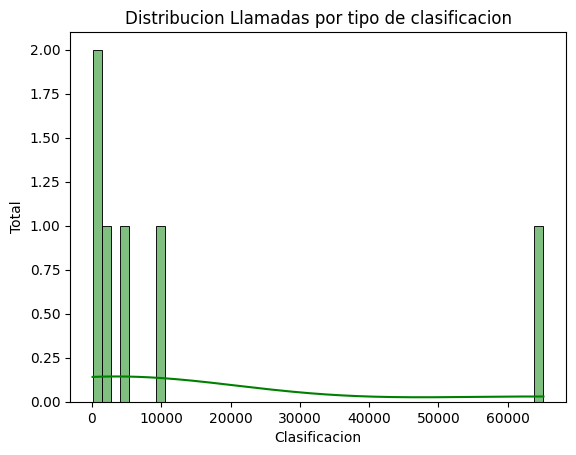

In [18]:

#iris = sns.load_dataset("iris")

# customize the histogram
sns.histplot(data, x=clasificacion_final_counts, bins=50, kde=True, color="green")

# add labels and title
plt.xlabel("Clasificacion")
plt.ylabel("Total")
plt.title("Distribucion Llamadas por tipo de clasificacion")

# display the plot
plt.show()

In [19]:
# Agrupar por localidad y tipos de incidente
incidentes_por_localidad = df_ejercicio.groupby(['LOCALIDAD', 'TIPO_INCIDENTE'])['TIPO_INCIDENTE'].count().reset_index(name='Total')
incidentes_por_localidad = incidentes_por_localidad.sort_values(by=['LOCALIDAD', 'Total'], ascending=[True, False])
print(incidentes_por_localidad)

          LOCALIDAD                             TIPO_INCIDENTE  Total
1    Antonio Nariño  Accidente de tránsito con heridos/muertos    280
12   Antonio Nariño      Inconsciente/paro cardiorrespiratorio    240
8    Antonio Nariño                                    Enfermo    204
5    Antonio Nariño                    Dificultad respiratoria    202
4    Antonio Nariño                               Convulsiones    142
..              ...                                        ...    ...
606            Usme                            Abrir domicilio      2
616            Usme              Fuga de gas natural o propano      2
626            Usme                                   Maltrato      2
630            Usme                                   Rescates      2
629            Usme                   Persona pidiendo auxilio      1

[636 rows x 3 columns]


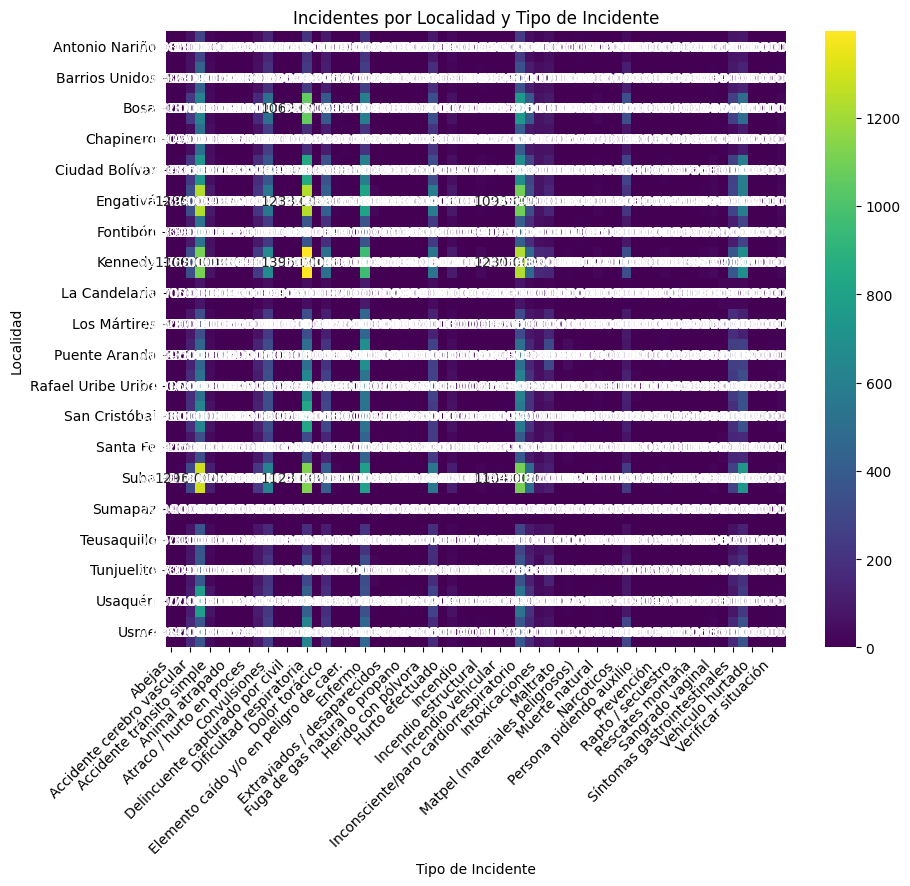

In [20]:
# clasificacion para el mapa de calor
heatmap_data = incidentes_por_localidad.pivot_table(index='LOCALIDAD', columns='TIPO_INCIDENTE', values='Total', fill_value=0)

# Crear mapa de calor
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='0f')
plt.title('Incidentes por Localidad y Tipo de Incidente')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Localidad')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [21]:
# Agrupacr tipos de incidente y ocurrencias
top_incidentes = df_ejercicio.groupby('TIPO_INCIDENTE')['TIPO_INCIDENTE'].count().reset_index(name='Total')

# Ordenar ascendente
top_incidentes = top_incidentes.sort_values(by=['Total'], ascending=False)

# top 5 de incidentes
top_5_incidentes = top_incidentes.head(5)

# imprimir resultados
print(top_5_incidentes)

                               TIPO_INCIDENTE  Total
3   Accidente de tránsito con heridos/muertos  10946
14                    Dificultad respiratoria  10877
36      Inconsciente/paro cardiorrespiratorio  10261
20                                    Enfermo   8852
10                               Convulsiones   5896


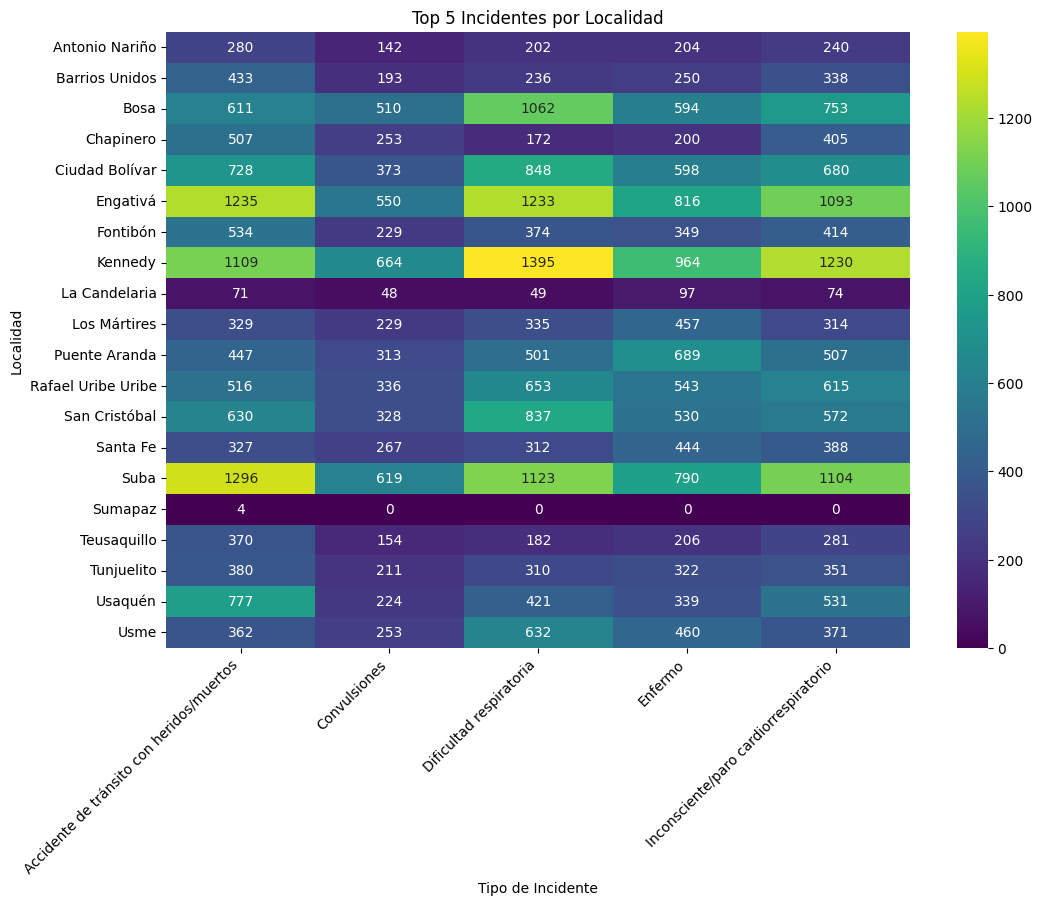

In [22]:
#Filtrar los datos originales para incluir solo los 5 incidentes principales
filtered_data = df_ejercicio[df_ejercicio['TIPO_INCIDENTE'].isin(top_5_incidentes['TIPO_INCIDENTE'])]

# Agrupar por localidad y tipo de incidentey conteo de ocurrencias
heatmap_data = filtered_data.groupby(['LOCALIDAD', 'TIPO_INCIDENTE'])['TIPO_INCIDENTE'].count().reset_index(name='Total')

# Matriz para mapa de calor
heatmap_data = heatmap_data.pivot_table(index='LOCALIDAD', columns='TIPO_INCIDENTE', values='Total', fill_value=0)

# Mpaa de calor
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.0f')
plt.title('Top 5 Incidentes por Localidad')
plt.xlabel('Tipo de Incidente')
plt.ylabel('Localidad')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [23]:
# Agrupar por localidad y clasificacion final , contar ocurrencias
clasificacion_por_localidad = df_ejercicio.groupby(['LOCALIDAD', 'CLASIFICACION_FINAL'])['CLASIFICACION_FINAL'].count().reset_index(name='Total')

# Ordenar resultados
clasificacion_por_localidad = clasificacion_por_localidad.sort_values(by=['LOCALIDAD', 'Total'], ascending=[True, False])

# mostrar resultados
print(clasificacion_por_localidad)

          LOCALIDAD          CLASIFICACION_FINAL  Total
5    Antonio Nariño                     Traslado   1343
0    Antonio Nariño                Desistimiento    243
2    Antonio Nariño          No Amerita Traslado     91
1    Antonio Nariño                    Fallecido     36
4    Antonio Nariño  Trasladado por Otro Recurso     22
..              ...                          ...    ...
109            Usme                Desistimiento    334
111            Usme          No Amerita Traslado    163
110            Usme                    Fallecido     90
113            Usme  Trasladado por Otro Recurso     44
112            Usme          Trasladado por Otro      4

[115 rows x 3 columns]


In [24]:
# ... (previous code to calculate clasificacion_por_localidad)

# Group by locality and sum the total incidents
top_localities = clasificacion_por_localidad.groupby('LOCALIDAD')['Total'].sum().reset_index(name='Total_Incidentes')

# Sort in descending order
top_localities = top_localities.sort_values(by=['Total_Incidentes'], ascending=False)

# Select the top 5
top_5_localities = top_localities.head(5)

# Display the results
print(top_5_localities)

         LOCALIDAD  Total_Incidentes
7          Kennedy              9466
14            Suba              8707
5         Engativá              8422
2             Bosa              6453
4   Ciudad Bolívar              6104


In [29]:
!pip install geopandas==0.13.2
!pip install folium==0.14.1

ERROR: Ignored the following yanked versions: 0.0.0
ERROR: Could not find a version that satisfies the requirement folium==0.14.1 (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.1.6, 0.2.0, 0.2.1, 0.3.0, 0.4.0, 0.5.0, 0.6.0, 0.7.0, 0.8.0, 0.8.2, 0.8.3, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.1.post1, 0.13.0, 0.14.0, 0.15.0, 0.15.1, 0.16.0, 0.17.0, 0.18.0)
ERROR: No matching distribution found for folium==0.14.1


In [3]:
!pip install --upgrade geopandas
!pip install --upgrade fiona

In [1]:
import geopandas as gpd
import folium
import pandas as pd

In [16]:
#bogota_shapefile = gpd.read_file('path//content/Prueba4.db.shp')
#merged_data = bogota_shapefile.merge(clasificacion_por_localidad, left_on='nombre_columna_localidad', right_on='LOCALIDAD', how='left')

import geopandas as gpd
import folium

# Define la ruta a tu shapefile de localidades de Bogotá.
# **Reemplaza 'ruta/a/localidades_bogota.shp' con la ruta real a tu archivo shapefile.**
#bogota_shapefile = gpd.read_file('ruta/a/localidades_bogota.shp')


import geopandas as gpd
import folium

# Define la ruta a tu shapefile de localidades de Bogotá.
# **Reemplaza 'ruta/a/localidades_bogota.shp' con la ruta real a tu archivo shapefile.**
bogota_shapefile = gpd.read_file('/content/drive/MyDrive/Analisis/Proyecto_Analisis/localidad.zip', encoding='utf-8')

# Crea un mapa centrado en Bogotá.
mapa_bogota = folium.Map(location=[4.60971, -74.08175], zoom_start=12)


# Añade las localidades al mapa como un GeoJson.
folium.GeoJson(
    bogota_shapefile,
    name='Localidades de Bogotá',  # Nombre de la capa en el mapa
    style_function=lambda feature: { # Estilo básico para las localidades
        'fillColor': 'lightblue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }
).add_to(mapa_bogota)

# Muestra el mapa.
mapa_bogota

In [11]:
import pandas as pd
import geopandas as gpd
import folium

# 1. Load the Bogota localities shapefile:
localidades_bogota = gpd.read_file('/content/drive/MyDrive/Analisis/Proyecto_Analisis/localidad.zip') # Replace with your actual path

# 2. Create or load your incident data:
# (Here, I'm using the simulated data from the previous example)
data = {
    'LOCALIDAD': ['Usaquén', 'Chapinero', 'Santa Fe', 'San Cristóbal', 'Usme',
                 'Tunjuelito', 'Bosa', 'Kennedy', 'Fontibón', 'Engativá',
                 'Suba', 'Barrios Unidos', 'Teusaquillo', 'Los Mártires', 'Antonio Nariño',
                 'Puente Aranda', 'La Candelaria', 'Rafael Uribe Uribe', 'Ciudad Bolívar', 'Sumapaz'],
    'NUM_INCIDENTES': [150, 120, 200, 80, 90,
                       100, 130, 180, 70, 110,
                       160, 95, 105, 140, 75,
                       125, 190, 85, 100, 50]
}
df_incidentes = pd.DataFrame(data)
#print(df_incidentes)
incidentes_agrupados = df_incidentes.groupby('LOCALIDAD')['NUM_INCIDENTES'].sum().reset_index()

# 3. Merge the aggregated data with the shapefile:


KeyError: 'LOCALIDAD'